#### Do CEACAM3 levels correlate with any clinical data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
meta_data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/human/data/Patient_meta_info.csv"
counts = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/human/data/2018-01-31_combined_custom_counts.csv"

In [53]:
meta = pd.read_csv(meta_data, index_col = 0)

meta
old_st = {"HM1":"HM01", "HM3":"HM03", "HM6":"HM06", "HM7":"HM07"}
STR = []
for st in list(meta.STRAIN):
    if st in old_st.keys():
        #print(st)
        st = old_st[st]
    STR.append(st)
meta.STRAIN=STR
meta.index = meta.STRAIN + "_" + meta.MEDIA
meta

,STRAIN,MEDIA,PHYLOGROUP,HISTORY,PRED_PHYLO,EPI_CELLS,RBC,ANCESTRY
HM01_UR,HM01,UR,E,N,E,S,A,A
HM01_UTI,HM01,UTI,E,N,E,S,A,A
HM03_UR,HM03,UR,B1,N,B1,S,N,B
HM03_UTI,HM03,UTI,B1,N,B1,S,N,B
HM06_UR,HM06,UR,B2,N,B2,S,A,C
HM06_UTI,HM06,UTI,B2,N,B2,S,A,C
HM07_UR,HM07,UR,B1,Y,B1,S,N,B
HM07_UTI,HM07,UTI,B1,Y,B1,S,N,B
HM14_UR,HM14,UR,B1,Y,B1,F,N,B
HM14_UTI,HM14,UTI,B1,Y,B1,F,N,B


In [54]:
counts_df = pd.read_csv(counts, index_col=0)
counts_df.index.name = ""
counts_df = counts_df.drop([col for col in list(counts_df.columns) if 'seq' in col], axis = 1)
counts_df = counts_df[[col for col in list(counts_df.columns) if "RPKM" in col]].T
counts_df.index = [i.split("_RPKM")[0] for i in list(counts_df.index)]
counts_df

,CEACAM3_variant1
HM01_UR,0.00
HM01_UTI,2.25
HM03_UR,0.00
HM03_UTI,5.17
HM06_UR,0.00
HM06_UTI,16.53
HM07_UR,0.00
HM07_UTI,24.34
HM14_UR,0.00
HM14_UTI,2.66


In [56]:
df1 = pd.merge(counts_df, meta, left_index=True, right_index=True)


In [57]:
df1

,CEACAM3_variant1,STRAIN,MEDIA,PHYLOGROUP,HISTORY,PRED_PHYLO,EPI_CELLS,RBC,ANCESTRY
HM01_UR,0.00,HM01,UR,E,N,E,S,A,A
HM01_UTI,2.25,HM01,UTI,E,N,E,S,A,A
HM03_UR,0.00,HM03,UR,B1,N,B1,S,N,B
HM03_UTI,5.17,HM03,UTI,B1,N,B1,S,N,B
HM06_UR,0.00,HM06,UR,B2,N,B2,S,A,C
HM06_UTI,16.53,HM06,UTI,B2,N,B2,S,A,C
HM07_UR,0.00,HM07,UR,B1,Y,B1,S,N,B
HM07_UTI,24.34,HM07,UTI,B1,Y,B1,S,N,B
HM14_UR,0.00,HM14,UR,B1,Y,B1,F,N,B
HM14_UTI,2.66,HM14,UTI,B1,Y,B1,F,N,B


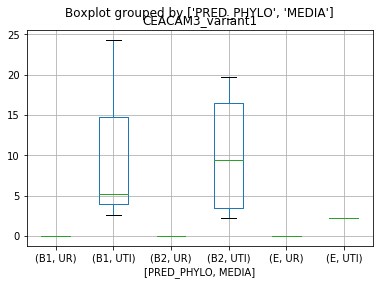

In [63]:
df1.boxplot(by=['PRED_PHYLO', 'MEDIA'])

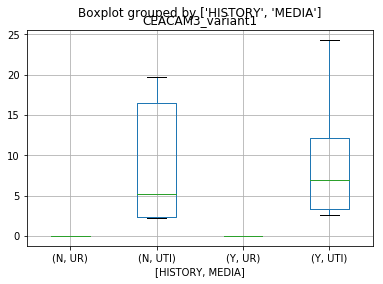

In [64]:
df1.boxplot(by=['HISTORY', 'MEDIA'])

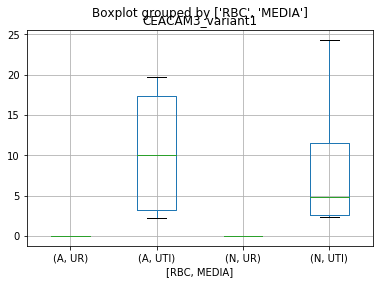

In [65]:
df1.boxplot(by=['RBC', 'MEDIA'])

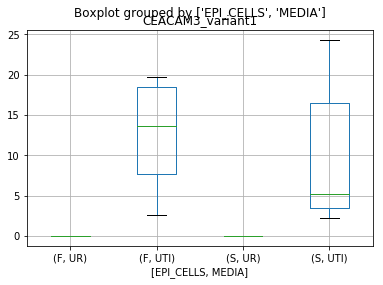

In [67]:
df1.boxplot(by=['EPI_CELLS', 'MEDIA'])